In [1]:

import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 9

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.1172 - loss: 2.3385
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0829 - loss: 2.3459 - val_accuracy: 0.0000e+00 - val_loss: 2.2635
Epoch 2/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1016 - loss: 2.2761
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0932 - loss: 2.2975 - val_accuracy: 0.0000e+00 - val_loss: 2.2256
Epoch 3/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0703 - loss: 2.2844
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0843 - loss: 2.2598 - val_accuracy: 0.0000e+00 - val_loss: 2.1920
Epoch 4/1000
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1016 - loss: 2.2043
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
5/

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9754 - loss: 0.1932


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[2.3288736e-05 1.1701071e-12 2.0108459e-08 9.0516041e-05 9.9985194e-01
 3.4130975e-05 2.1397005e-07 5.9663052e-11 1.8172897e-11]
4


# Confusion matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


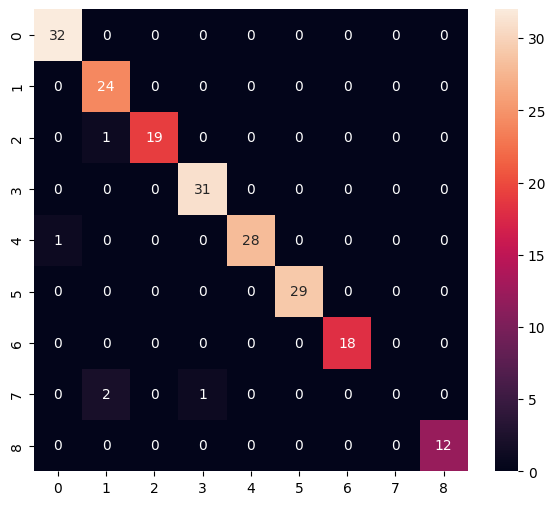

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.89      1.00      0.94        24
           2       1.00      0.95      0.97        20
           3       0.97      1.00      0.98        31
           4       1.00      0.97      0.98        29
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        18
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00        12

    accuracy                           0.97       198
   macro avg       0.87      0.88      0.87       198
weighted avg       0.96      0.97      0.97       198



/Users/diegobautista/Desktop/Code/python-recognize/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/diegobautista/Desktop/Code/python-recognize/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/diegobautista/Desktop/Code/python-recognize/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/cx/8g4js06d2r90rfvp53ncvhxw0000gn/T/tmp2fw70ic_/assets


INFO:tensorflow:Assets written to: /var/folders/cx/8g4js06d2r90rfvp53ncvhxw0000gn/T/tmp2fw70ic_/assets


Saved artifact at '/var/folders/cx/8g4js06d2r90rfvp53ncvhxw0000gn/T/tmp2fw70ic_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  13489077520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13491652944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13491651792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13491665040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13491665808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13491664080: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1737485275.386090 5975716 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1737485275.386296 5975716 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1737485275.389821 5975716 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


6776

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 219 μs, sys: 522 μs, total: 741 μs
Wall time: 856 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3288780e-05 1.1701095e-12 2.0108498e-08 9.0516216e-05 9.9985194e-01
 3.4131073e-05 2.1397047e-07 5.9663295e-11 1.8172934e-11]
4
